# 1. Data wrangling

In [3]:
# Code to get the data
# The data is updated daily. The latest entry loaded in our project is 2023-11-29
!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

--2023-11-30 16:01:03--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.26.3.153, 104.26.2.153, 172.67.73.95, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.26.3.153|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://covid-19.nyc3.digitaloceanspaces.com/public/owid-covid-data.csv [following]
--2023-11-30 16:01:04--  https://covid-19.nyc3.digitaloceanspaces.com/public/owid-covid-data.csv
Resolving covid-19.nyc3.digitaloceanspaces.com (covid-19.nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to covid-19.nyc3.digitaloceanspaces.com (covid-19.nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93873986 (90M) [binary/octet-stream]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  89.52M   120MB/s    in 0.7s    

2023-11-30 16:01:04 (1

In [4]:
!mv owid-covid-data.csv covid.csv

In [3]:
!csvcut -n covid.csv

  1: iso_code
  2: continent
  3: location
  4: date
  5: total_cases
  6: new_cases
  7: new_cases_smoothed
  8: total_deaths
  9: new_deaths
 10: new_deaths_smoothed
 11: total_cases_per_million
 12: new_cases_per_million
 13: new_cases_smoothed_per_million
 14: total_deaths_per_million
 15: new_deaths_per_million
 16: new_deaths_smoothed_per_million
 17: reproduction_rate
 18: icu_patients
 19: icu_patients_per_million
 20: hosp_patients
 21: hosp_patients_per_million
 22: weekly_icu_admissions
 23: weekly_icu_admissions_per_million
 24: weekly_hosp_admissions
 25: weekly_hosp_admissions_per_million
 26: total_tests
 27: new_tests
 28: total_tests_per_thousand
 29: new_tests_per_thousand
 30: new_tests_smoothed
 31: new_tests_smoothed_per_thousand
 32: positive_rate
 33: tests_per_case
 34: tests_units
 35: total_vaccinations
 36: people_vaccinated
 37: people_fully_vaccinated
 38: total_boosters
 39: new_vaccinations
 40: new_vaccinations_smoothed
 41: total_vaccinations_per_hundre

In [6]:
!csvclean covid.csv

No errors.


# 2. Star Schema

In [30]:
from IPython.display import Image
Image(url="https://github.com/alienweb/DMA-Final-Project/blob/main/Covid-Dim-Design-03.png?raw=true")

# 3. Analytical Database Tables

In [1]:
%load_ext sql

In [18]:
!dropdb -U student f_group_10

In [3]:
!createdb -U student f_group_10

In [2]:
%sql postgresql://student@/f_group_10

In [1]:
!head -n 10000 covid.csv | csvstat

  1. "iso_code"

	Type of data:          Text
	Contains null values:  False
	Unique values:         8
	Longest value:         8 characters
	Most common values:    AFG (1420x)
	                       OWID_AFR (1420x)
	                       ALB (1420x)
	                       DZA (1420x)
	                       ASM (1420x)

  2. "continent"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         6
	Longest value:         13 characters
	Most common values:    Europe (2840x)
	                       Africa (2840x)
	                       Asia (1420x)
	                       None (1420x)
	                       Oceania (1420x)

  3. "location"

	Type of data:          Text
	Contains null values:  False
	Unique values:         8
	Longest value:         14 characters
	Most common values:    Afghanistan (1420x)
	                       Africa (1420x)
	                       Albania (1420x)
	                       Algeria (1420x)
	         

## Create fact table "covid" - operational database

In [5]:
%%sql
DROP TABLE IF EXISTS covid;

CREATE TABLE covid (
    iso_code VARCHAR(10) NOT NULL,
    continent VARCHAR(20),
    location VARCHAR(60) NOT NULL,
    date DATE NOT NULL,
    total_cases NUMERIC(20),
    new_cases NUMERIC(20),
    new_cases_smoothed NUMERIC(20),
    total_deaths NUMERIC(20),
    new_deaths NUMERIC(20),
    new_deaths_smoothed NUMERIC(20),
    total_cases_per_million NUMERIC(20),
    new_cases_per_million NUMERIC(20),
    new_cases_smoothed_per_million NUMERIC(20),
    total_deaths_per_million NUMERIC(20),
    new_deaths_per_million NUMERIC(20),
    new_deaths_smoothed_per_million NUMERIC(20),
    reproduction_rate NUMERIC(20),
    icu_patients NUMERIC(20),
    icu_patients_per_million NUMERIC(20),
    hosp_patients NUMERIC(20),
    hosp_patients_per_million NUMERIC(20),
    weekly_icu_admissions NUMERIC(20),
    weekly_icu_admissions_per_million NUMERIC(20),
    weekly_hosp_admissions NUMERIC(20),
    weekly_hosp_admissions_per_million NUMERIC(20),
    total_tests NUMERIC(20),
    new_tests NUMERIC(20),
    total_tests_per_thousand NUMERIC(20),
    new_tests_per_thousand NUMERIC(20),
    new_tests_smoothed NUMERIC(20),
    new_tests_smoothed_per_thousand NUMERIC(20),
    positive_rate NUMERIC(20),
    tests_per_case NUMERIC(20),
    tests_units varchar(15),
    total_vaccinations numeric(20),
    people_vaccinated numeric(20),
    people_vaccinated_per_hundred numeric(10),
    people_fully_vaccinated numeric(20),
    total_boosters numeric(20),
    new_vaccinations numeric(20),
    new_vaccinations_smoothed numeric(20),
    total_vaccinations_per_hundred numeric(20),
    people_fully_vaccinated_per_hundred numeric(20),
    total_boosters_per_hundred numeric(20),
    new_vaccinations_smoothed_per_million numeric(20),
    new_people_vaccinated_smoothed numeric(20),
    new_people_vaccinated_smoothed_per_hundred numeric(20),
    stringency_index numeric(20),
    population_density numeric(20),
    median_age numeric(20),
    aged_65_older numeric(20),
    aged_70_older numeric(20),
    gdp_per_capita numeric(20),
    extreme_poverty numeric(20),
    cardiovasc_death_rate numeric(20),
    diabetes_prevalence numeric(20),
    female_smokers numeric(20),
    male_smokers numeric(20),
    handwashing_facilities numeric(20),
    hospital_beds_per_thousand numeric(20),
    life_expectancy numeric(20),
    human_development_index numeric(20),
    population numeric(20) NOT NULL,
    excess_mortality_cumulative_absolute numeric(20),
    excess_mortality_cumulative numeric(20),
    excess_mortality numeric(20),
    excess_mortality_cumulative_per_million numeric(20)


)

 * postgresql://student@/f_group_10
Done.
Done.


[]

In [6]:
%%sql
COPY covid FROM '/home/ubuntu/notebooks/shell-lesson-data/Final project/covid.csv'
CSV
HEADER;

 * postgresql://student@/f_group_10
358802 rows affected.


[]

In [32]:
!wc -l covid.csv

358803 covid.csv


In [4]:
%%sql
SELECT COUNT(*) FROM covid;

 * postgresql://student@/f_group_10
1 rows affected.


count
358802


## Create dimension time

In [6]:
%%sql
SELECT DISTINCT date, 
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    TO_CHAR(date, 'YYYY') AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    TO_CHAR(date, 'MM') AS month_of_year,
    TO_CHAR(date, 'DD') AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    TO_CHAR(date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) in (7,1)
        THEN 'true' 
        ELSE 'false'
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) Not in (7,1) 
        THEN 'true' 
        ELSE 'false'
    END AS is_weekday,
    TO_CHAR(date, 'Q') AS quarter_of_year
FROM covid
LIMIT 10;

 * postgresql://student@/group_10
10 rows affected.


date,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
2023-06-13,2023-06-13,2023,June,06,13,Tuesday,3,false,true,2
2023-03-27,2023-03-27,2023,March,03,27,Monday,2,false,true,1
2021-12-22,2021-12-22,2021,December,12,22,Wednesday,4,false,true,4
2022-03-02,2022-03-02,2022,March,03,02,Wednesday,4,false,true,1
2022-12-23,2022-12-23,2022,December,12,23,Friday,6,false,true,4
2021-01-27,2021-01-27,2021,January,01,27,Wednesday,4,false,true,1
2021-07-05,2021-07-05,2021,July,07,05,Monday,2,false,true,3
2023-03-01,2023-03-01,2023,March,03,01,Wednesday,4,false,true,1
2023-01-14,2023-01-14,2023,January,01,14,Saturday,7,true,false,1
2022-09-21,2022-09-21,2022,September,09,21,Wednesday,4,false,true,3


In [7]:
%%sql
DROP TABLE IF EXISTS date;

CREATE TABLE date (
    key SERIAL PRIMARY KEY,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    quarter_of_year INTEGER
);

 * postgresql://student@/f_group_10
Done.
Done.


[]

In [8]:
%%sql
INSERT INTO date (day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday,
                  quarter_of_year)
SELECT DISTINCT TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter_of_year

FROM covid
;

 * postgresql://student@/f_group_10
1429 rows affected.


[]

In [9]:
%%sql
ALTER TABLE covid
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES date (key);

 * postgresql://student@/f_group_10
Done.


[]

In [6]:
%%sql
select *
from covid
limit 10;

 * postgresql://student@/group_10
10 rows affected.


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,date_key
VEN,South America,Venezuela,2021-12-07,434918,785,603,5193,7,8,15367,28,21,183,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,34,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South America,Venezuela,2021-12-08,435461,543,595,5202,9,8,15386,19,21,184,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,34,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South America,Venezuela,2021-12-09,435825,364,554,5208,6,8,15399,13,20,184,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,29,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South America,Venezuela,2021-12-10,436178,353,523,5216,8,8,15412,12,18,184,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,29,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South America,Venezuela,2021-12-11,436602,424,485,5223,7,8,15427,15,17,185,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,29,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South America,Venezuela,2021-12-12,437113,511,493,5229,6,7,15445,18,17,185,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,29,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South America,Venezuela,2021-12-13,437887,774,536,5234,5,7,15472,27,19,185,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,29,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South America,Venezuela,2021-12-14,438683,796,538,5239,5,7,15500,28,19,185,0,0,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,207518,None,None,None,None,7332,109880,0,29,36,29,7,4,16745,None,205,6,None,None,None,1,72,1,28301700,None,None,None,None,None
VEN,South Amer

In [10]:
%%sql
UPDATE covid
SET date_key = date.key
FROM date
WHERE TO_CHAR(covid.date, 'YYYY-MM-DD') = date.day

;

 * postgresql://student@/f_group_10
358802 rows affected.


[]

## Country dimension

In [11]:
%%sql
select distinct location, iso_code, continent,population, population_density, median_age, aged_65_older, aged_70_older,
gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities,
hospital_beds_per_thousand,life_expectancy, human_development_index
from covid
limit 1
;

 * postgresql://student@/f_group_10
1 rows affected.


location,iso_code,continent,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
Afghanistan,AFG,Asia,41128772,54,19,3,1,1804,None,597,10,None,None,38,1,65,1


In [12]:
%%sql
DROP TABLE IF EXISTS country;

CREATE TABLE country (
    key SERIAL PRIMARY KEY,
    location varchar(60) UNIQUE, 
    iso_code varchar(20) UNIQUE, 
    continent varchar(20),
    population numeric(20) NOT NULL,
    population_density varchar(20), 
    median_age varchar(20), 
    aged_65_older varchar(20), 
    aged_70_older varchar(20),
    gdp_per_capita varchar(20), 
    extreme_poverty varchar(20), 
    cardiovasc_death_rate varchar(20), 
    diabetes_prevalence varchar(20), 
    female_smokers varchar(20), 
    male_smokers varchar(20), 
    handwashing_facilities varchar(20),
    hospital_beds_per_thousand varchar(20),
    life_expectancy varchar(20), 
    human_development_index varchar(20)
);

 * postgresql://student@/f_group_10
Done.
Done.


[]

In [13]:
%%sql
INSERT INTO country (location, iso_code, continent,population, population_density, median_age, aged_65_older, aged_70_older,
gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities,
hospital_beds_per_thousand,life_expectancy, human_development_index)

select distinct location, iso_code, continent,population, population_density, median_age, aged_65_older, aged_70_older,
gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities,
hospital_beds_per_thousand,life_expectancy, human_development_index
from covid
;

 * postgresql://student@/f_group_10
255 rows affected.


[]

In [14]:
%%sql
ALTER TABLE covid
ADD COLUMN country_key INTEGER,
ADD constraint fk_country
    FOREIGN KEY (country_key)
    REFERENCES country (key)

 * postgresql://student@/f_group_10
Done.


[]

In [15]:
%%sql
UPDATE covid
set country_key = country.key
from country
where covid.iso_code = country.iso_code

 * postgresql://student@/f_group_10
358802 rows affected.


[]

## Deleting redundant columns

In [16]:
%%sql
ALTER TABLE covid
DROP COLUMN location, 
DROP COLUMN iso_code, 
DROP COLUMN continent,
DROP COLUMN population,
DROP COLUMN population_density, 
DROP COLUMN median_age, 
DROP COLUMN aged_65_older, 
DROP COLUMN aged_70_older,
DROP COLUMN gdp_per_capita,
DROP COLUMN extreme_poverty, 
DROP COLUMN cardiovasc_death_rate,
DROP COLUMN diabetes_prevalence, 
DROP COLUMN female_smokers, 
DROP COLUMN male_smokers, 
DROP COLUMN handwashing_facilities,
DROP COLUMN hospital_beds_per_thousand,
DROP COLUMN life_expectancy, 
DROP COLUMN human_development_index,
DROP COLUMN date
;

 * postgresql://student@/f_group_10
Done.


[]

In [17]:
%%sql
select * 
from covid
limit 1;

 * postgresql://student@/f_group_10
1 rows affected.


total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,date_key,country_key
None,0,None,None,0,None,None,0,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,362,122


In [5]:
%%sql
COMMENT ON TABLE covid IS 
'Covid table: holds covid information for 255 countries';

 * postgresql://student@/f_group_10
Done.


[]

In [7]:
%%sql
SELECT obj_description(oid, 'pg_class')
FROM pg_class
WHERE upper(relname) = 'COVID';

 * postgresql://student@/f_group_10
1 rows affected.


obj_description
Covid table: holds covid information for 255 countries


# 4. Initial queries to describe the dataset

Query 1: Total deaths per country since the beginning of the pandemic up to 2023-11-29

Query 2: Total cases per year since the beginning of the pandemic up to 2023-11-29

Query 3: Total deaths per year since the beginning of the pandemic up to 2023-11-29

Query 4: Vaccinated world population per year since the beginning of the pandemic up to 2023-11-29


In [15]:
%%sql
--Query 1
SELECT
    location country,
    MAX(total_deaths) AS yearly_total_deaths
    
FROM
    covid cov
JOIN
    country c ON cov.country_key = c.key
JOIN
    date d ON cov.date_key = d.key
WHERE
    total_deaths IS NOT NULL
    AND c.location NOT IN ('World', 'High income', 'Upper middle income', 'Europe',
                           'North America', 'Asia', 'South America', 'Lower middle income', 'European Union','Africa','Low income')
    AND d.day BETWEEN '2020-01-01' AND '2023-12-03'
GROUP BY
    location
ORDER BY
    yearly_total_deaths DESC
LIMIT 50

 * postgresql://student@/f_group_10
50 rows affected.


country,yearly_total_deaths
United States,1138309
Brazil,704659
India,533295
Russia,400395
Mexico,334786
United Kingdom,232112
Peru,221727
Italy,192909
Germany,174979
France,167985


In [13]:
%%sql
--Query 2
SELECT
location, year,
    max(total_cases) as yearly_total_cases
    
FROM
    covid cov
JOIN
    country c ON cov.country_key = c.key
JOIN
    date d ON cov.date_key = d.key
WHERE
    total_cases IS NOT NULL
    AND c.location IN ('World')
GROUP BY
    c.location, year
ORDER BY
    yearly_total_cases DESC
;

 * postgresql://student@/f_group_10
4 rows affected.


location,year,yearly_total_cases
World,2023,772165753
World,2022,729475584
World,2021,285446052
World,2020,82334829


In [12]:
%%sql
-- Query 3
SELECT
location, year,
    max(total_deaths) as yearly_total_deaths
    
FROM
    covid cov
JOIN
    country c ON cov.country_key = c.key
JOIN
    date d ON cov.date_key = d.key
WHERE
    total_deaths IS NOT NULL
    AND c.location IN ('World')
GROUP BY
    c.location, year
ORDER BY
  yearly_total_deaths DESC
;

 * postgresql://student@/f_group_10
4 rows affected.


location,year,yearly_total_deaths
World,2023,6981250
World,2022,6720253
World,2021,5474097
World,2020,1936739


In [10]:
%%sql
-- Query 4
SELECT
    d.year, population world_population,
    MAX(cov.people_vaccinated) as vaccinated_world_population
FROM
    covid cov
JOIN
    country c ON cov.country_key = c.key
JOIN
    date d ON cov.date_key = d.key
WHERE
    cov.people_vaccinated IS NOT NULL
    AND c.location = 'World'
GROUP BY
    d.year, c.population
ORDER BY
    d.year desc;

 * postgresql://student@/f_group_10
4 rows affected.


year,world_population,vaccinated_world_population
2023,7975105024,5630478164
2022,7975105024,5504033343
2021,7975105024,4558268047
2020,7975105024,7232741


# 5. Analytical Question

## 5.1 Analytical question 1


On January 30th 2021, the EU authorized covid vaccines. Is there a significant difference in the trends of the weekly changes of the percentage of vaccinated populations of countries with the highest average stringency index compared to the countries with the lowest up to a year after the EU authorization of the vaccines?

EU Countries to consider:

Czechia, Austria, Belgium, Bulgaria, Croatia, Cyprus, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden, United Kingdom (was part of the EU then)

In [16]:
%%sql
-- To get top country
SELECT c.iso_code, c.location, Round(AVG(cov.stringency_index),2) AS avg_stringency
FROM covid cov
INNER JOIN date d ON cov.date_key = d.key
INNER JOIN country c ON cov.country_key = c.key
WHERE c.location IN ('Czechia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark', 
'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 
'Lithuania', 'Luxembourg', 'Malta', 'United Kingdom',
'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden')
AND d.day BETWEEN '2021-01-30' AND '2022-01-30'
GROUP BY c.iso_code, c.location
ORDER BY avg_stringency DESC
limit 1;

 * postgresql://student@/f_group_10
1 rows affected.


iso_code,location,avg_stringency
GRC,Greece,71.59


In [17]:
%%sql
-- To get last country
SELECT c.iso_code, c.location, Round(AVG(cov.stringency_index),2) AS avg_stringency
FROM covid cov
INNER JOIN date d ON cov.date_key = d.key
INNER JOIN country c ON cov.country_key = c.key
WHERE c.location IN ('Czechia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark', 
'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 
'Lithuania', 'Luxembourg', 'Malta', 'United Kingdom',
'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden')
AND d.day BETWEEN '2021-01-30' AND '2022-01-30'
GROUP BY c.iso_code, c.location
ORDER BY avg_stringency
limit 1;

 * postgresql://student@/f_group_10
1 rows affected.


iso_code,location,avg_stringency
EST,Estonia,37.95


In [4]:
%%sql
-- to get the trend data of vaccinated people in Greece and Estonia
SELECT co.iso_code, ROUND((cov.people_vaccinated/co.population)*100,2) AS Percentage_of_Population_Vaccinated , d.day
FROM covid cov
JOIN date d ON cov.date_key = d.key
JOIN country co ON co.key = cov.country_key
WHERE country_key in (86,68)
  AND d.day BETWEEN '2021-01-30' AND '2022-01-30' AND d.day_of_week = 7
GROUP BY co.iso_code, d.day_of_week, Percentage_of_Population_Vaccinated,d.day
ORDER BY d.day;

 * postgresql://student@/f_group_10
106 rows affected.


iso_code,percentage_of_population_vaccinated,day
EST,2.10,2021-01-30
GRC,2.24,2021-01-30
EST,2.69,2021-02-06
GRC,3.06,2021-02-06
EST,3.47,2021-02-13
GRC,3.58,2021-02-13
EST,4.66,2021-02-20
GRC,4.49,2021-02-20
EST,5.91,2021-02-27
GRC,5.51,2021-02-27


First, we used the highest_stringency variable from the dataset to determine the average stringency index for a selected group of EU countries within the period
from January 30, 2021, to January 1, 2022.

We then used the SELECT statement to retrieve columns from the data including "Highest Stringency", "Country Location", "Week start date", and "People
Vaccinated". Using the selected information we further cacluated the percentage of the weekly percentage of the vaccinated population. This data is obtained by
joining the ‘covid,’ ‘date,’ and ‘country’ tables together, with additional conditions applied for the date range and specific ISO codes. The result is
thengrouped by country location and truncated week start date, providing insights into the trends in the weekly percentages of the vaccinated population for the
country with the highest average stringency index.

Result:
Combining the aforementioned findings, we can conclude that both countries exhibit a stable upward trend. By the end of the period, Greece, with the most stringent policies, achieved a weekly vaccination rate 8.41% higher than Estonia, which had the least stringent policies. This suggests a reasonable inference that nations with more rigorous policies tend to demonstrate better performance in terms of weekly vaccine administration compared to those with less strict policies.

The findings from this query can provide valuable insights for policymakers, public health officials, and researchers, assisting in the assessment of the impact of varying levels of policy strictness on vaccination prevalence. If the government's objective is to enhance the national vaccination rate, the observed correlation between policy stringency and the performance of weekly vaccination administration serves as a reference point for countries when crafting pandemic-related policies. This information is crucial for guiding future decision-making processes related to public health and vaccination strategies.

Potential Business Values:

1. Forecasting Future Vaccine Demand:
   Companies may leverage vaccination trends during the pandemic to predict future vaccine demand, optimizing production and supply chain plans.

2. Market Opportunity Discovery:
   Analyzing vaccination trend in countries with high stringency measures may reveal potential markets for vaccine demand. This could assist in adjusting sales strategies, prioritizing these markets, and launching related products or services.

3. Business Risk Management:
   Regions or countries with low vaccination rates may suggest supply chain and productivity risks in the next pandemic. Proactive adjustments through data analysis, such as increasing inventory, can help manage potential business disruptions.


## 5.2 Analytical question 2

Research indicates that specific factors like smoking and age play a role in determining individuals' vulnerability. Is it possible to evaluate, for each continent, which country is most vulnerable based on factors such as the percentage of the population that smokes, the cardiovascular death rate, and the percentage of the population aged 65 and above? Following this, can we analyze the virus's impact in these countries by comparing the number of deaths to those in the same continent that are, by the same criteria, considered the least vulnerable?

In order to solve this question, we first need to break it down into smaller parts. 

First, we notice that we have a few transformations to perform.
We want to classify countries in terms of their vulnerability. We do not have a column in our file that measures vulnerability based on the percentage of the population that smokes, the cardiovascular death rate and the percentage of the population aged 65 and above. 
We will have to create that column.
In that column, we will assign weights to each factor and use it to rank the countries. 
Before creating the vulnerability index mentioned above, we have a few other transformations to perform on:
The cardiovascular death rate which is given as a number of deaths per 100,000 people. We will convert it to percentages.
The percentage of the population that smokes will be derived from the percentage of male smokers and the percentage of female smokers. 

Those three columns (cardiovascular death rate in percentage, percentage of the population that smokes and percentage of the population aged 65 above) as well as location (country name) and continent will be used to create a view. 

From the view we will create the vulnerability index and rank it after partitioning by continent. We can then select the most vulnerable and least vulnerable countries in each continent. 

After getting the countries names, we will proceed to assess the impact of the virus in each of those countries (ratio of total deaths to total cases will be used to assess impact)  



In [5]:
%%sql 
DROP view IF EXISTS view2;
create view view2 as 
select  continent, location, round((((round((cast(female_smokers as decimal)/100),2) * population) + (round((cast(male_smokers as decimal)/100),2) * population))/population)*100,2) smoker_percentage,
 round((cast(cardiovasc_death_rate as decimal)/100000)*100,2) cardio, aged_65_older
from country
where aged_65_older is not null and
female_smokers is not null and 
male_smokers is not null and 
cardiovasc_death_rate is not null
--create view to answer question;

 * postgresql://student@/f_group_10
Done.
Done.


[]

In [19]:
%%sql
-- Get most vulnerable countries per continent
with rankedCountries as (
    select  continent, location country, ((0.33*smoker_percentage)+(0.33*cardio)+(0.33* cast(aged_65_older as decimal))) weighted_v,
    row_number() over (partition by continent order by ((0.33*smoker_percentage)+(0.33*cardio)+(0.33* cast(aged_65_older as decimal))) desc) as ranking
    from view2
     )
 select
continent, country, weighted_v
from RankedCountries
where ranking = 1
;

 * postgresql://student@/f_group_10
7 rows affected.


continent,country,weighted_v
Africa,Tunisia,24.8556
Asia,Timor,29.1522
Europe,Montenegro,35.4387
North America,Cuba,28.1127
Oceania,Kiribati,32.8152
South America,Chile,28.7529
None,World,16.5759


In [20]:
%%sql
-- Get least vulnerable countries per continent
with rankedCountries as (
    select  continent, location country, ((0.33*smoker_percentage)+(0.33*cardio)+(0.33* cast(aged_65_older as decimal))) weighted_v,
    row_number() over (partition by continent order by ((0.33*smoker_percentage)+(0.33*cardio)+(0.33* cast(aged_65_older as decimal)))) as ranking
    from view2
     )
 select
continent, country, weighted_v
from RankedCountries
where ranking = 1
;

 * postgresql://student@/f_group_10
7 rows affected.


continent,country,weighted_v
Africa,Ghana,3.7290
Asia,Oman,6.3591
Europe,Iceland,14.2296
North America,Panama,6.6429
Oceania,Vanuatu,14.0415
South America,Ecuador,6.9762
None,World,16.5759


In [21]:
%%sql
-- deaths to cases ratio
select c.location country, round((round((max(total_deaths)/max(total_cases)),4)*100),2) deaths_to_cases

from covid cov

join
country c on cov.country_key = c.key

WHERE c.location IN ('Tunisia','Ghana','Timor','Oman','Montenegro','Iceland','Cuba','Panama','Kiribati','Australia','Chile','Ecuador')
group by c.location
order by deaths_to_cases desc;



 * postgresql://student@/f_group_10
12 rows affected.


country,deaths_to_cases
Ecuador,3.37
Tunisia,2.55
Chile,1.22
Oman,1.16
Montenegro,1.06
Ghana,0.85
Panama,0.83
Cuba,0.76
Timor,0.59
Kiribati,0.47


## 5.3 Analytical question 3

Assessing a nation’s response to the pandemic and conversely the pandemic’s impact on a nation can be gauged by the reported numbers of new cases. Are there notable variations in the patterns of monthly total new cases across different continents? Upon analyzing these trends, determine whether the cumulative new cases reported are distributed uniformly across all countries within a continent or if a specific country predominantly contributes to this total. In cases where one country significantly influences the majority of the total new cases, can we also offer insights into potential factors contributing to why that specific country is disproportionately affected by new cases


In [22]:
%%sql
-- new covid cases in each continent group by each month
select SPLIT_PART(c.day, '-', 1) || '-' ||SPLIT_PART(c.day, '-', 2)  as month,
       sum(case when continent = 'Africa' then b.new_cases else 0 end) africa_new_cases,
       sum(case when continent = 'Asia' then b.new_cases else 0 end) Asia_new_cases,
       sum(case when continent = 'Europe' then b.new_cases else 0 end) Europe_new_cases,
       sum(case when continent = 'North America' then b.new_cases else 0 end) NAmerica_new_cases,
       sum(case when continent = 'Oceania' then b.new_cases else 0 end) Oceania_new_cases,
       sum(case when continent = 'South America' then b.new_cases else 0 end) SAmerica_new_cases
from (select * from country where continent is not null) a 
join (select * from covid where country_key is not null) b 
on a.key = b.country_key 
join (select * from date) c 
on b.date_key = c.key
group by SPLIT_PART(c.day, '-', 1) || '-' ||SPLIT_PART(c.day, '-', 2)
order by month;


 * postgresql://student@/f_group_10
47 rows affected.


month,africa_new_cases,asia_new_cases,europe_new_cases,namerica_new_cases,oceania_new_cases,samerica_new_cases
2020-01,0,9823,14,11,9,0
2020-02,3,73497,1096,79,17,2
2020-03,5658,86460,402635,185427,5050,12483
2020-04,31978,334418,764888,943311,3056,145246
2020-05,106939,601599,609602,916622,500,655117
2020-06,256265,1150241,442882,1056250,702,1362062
2020-07,516509,1925651,432334,2265908,8743,1824829
2020-08,335551,2995166,811092,1865161,11412,2269540
2020-09,229879,3712163,1394366,1512017,3888,1781945
2020-10,302963,3274607,4369575,2204133,8400,1611547


In [25]:
!chmod a+rwx '/home/ubuntu/notebooks/Final project'

In [26]:
%%sql
COPY (select SPLIT_PART(c.day, '-', 1)||'-'||SPLIT_PART(c.day, '-', 2)  as month,
       sum(case when continent = 'Africa' then b.new_cases else 0 end) africa_new_cases,
       sum(case when continent = 'Asia' then b.new_cases else 0 end) asia_new_cases,
       sum(case when continent = 'Europe' then b.new_cases else 0 end) europe_new_cases,
       sum(case when continent = 'North America' then b.new_cases else 0 end) namerica_new_cases,
       sum(case when continent = 'Oceania' then b.new_cases else 0 end) oceania_new_cases,
       sum(case when continent = 'South America' then b.new_cases else 0 end) samerica_new_cases
from (select * from country where continent is not null) a 
join (select * from covid where country_key is not null) b 
on a.key = b.country_key 
join (select * from date) c 
on b.date_key = c.key
group by SPLIT_PART(c.day, '-', 1)||'-'||SPLIT_PART(c.day, '-', 2)
order by month) TO '/home/ubuntu/notebooks/Final project/data_file.csv' 
CSV
HEADER;


 * postgresql://student@/f_group_10
47 rows affected.


[]

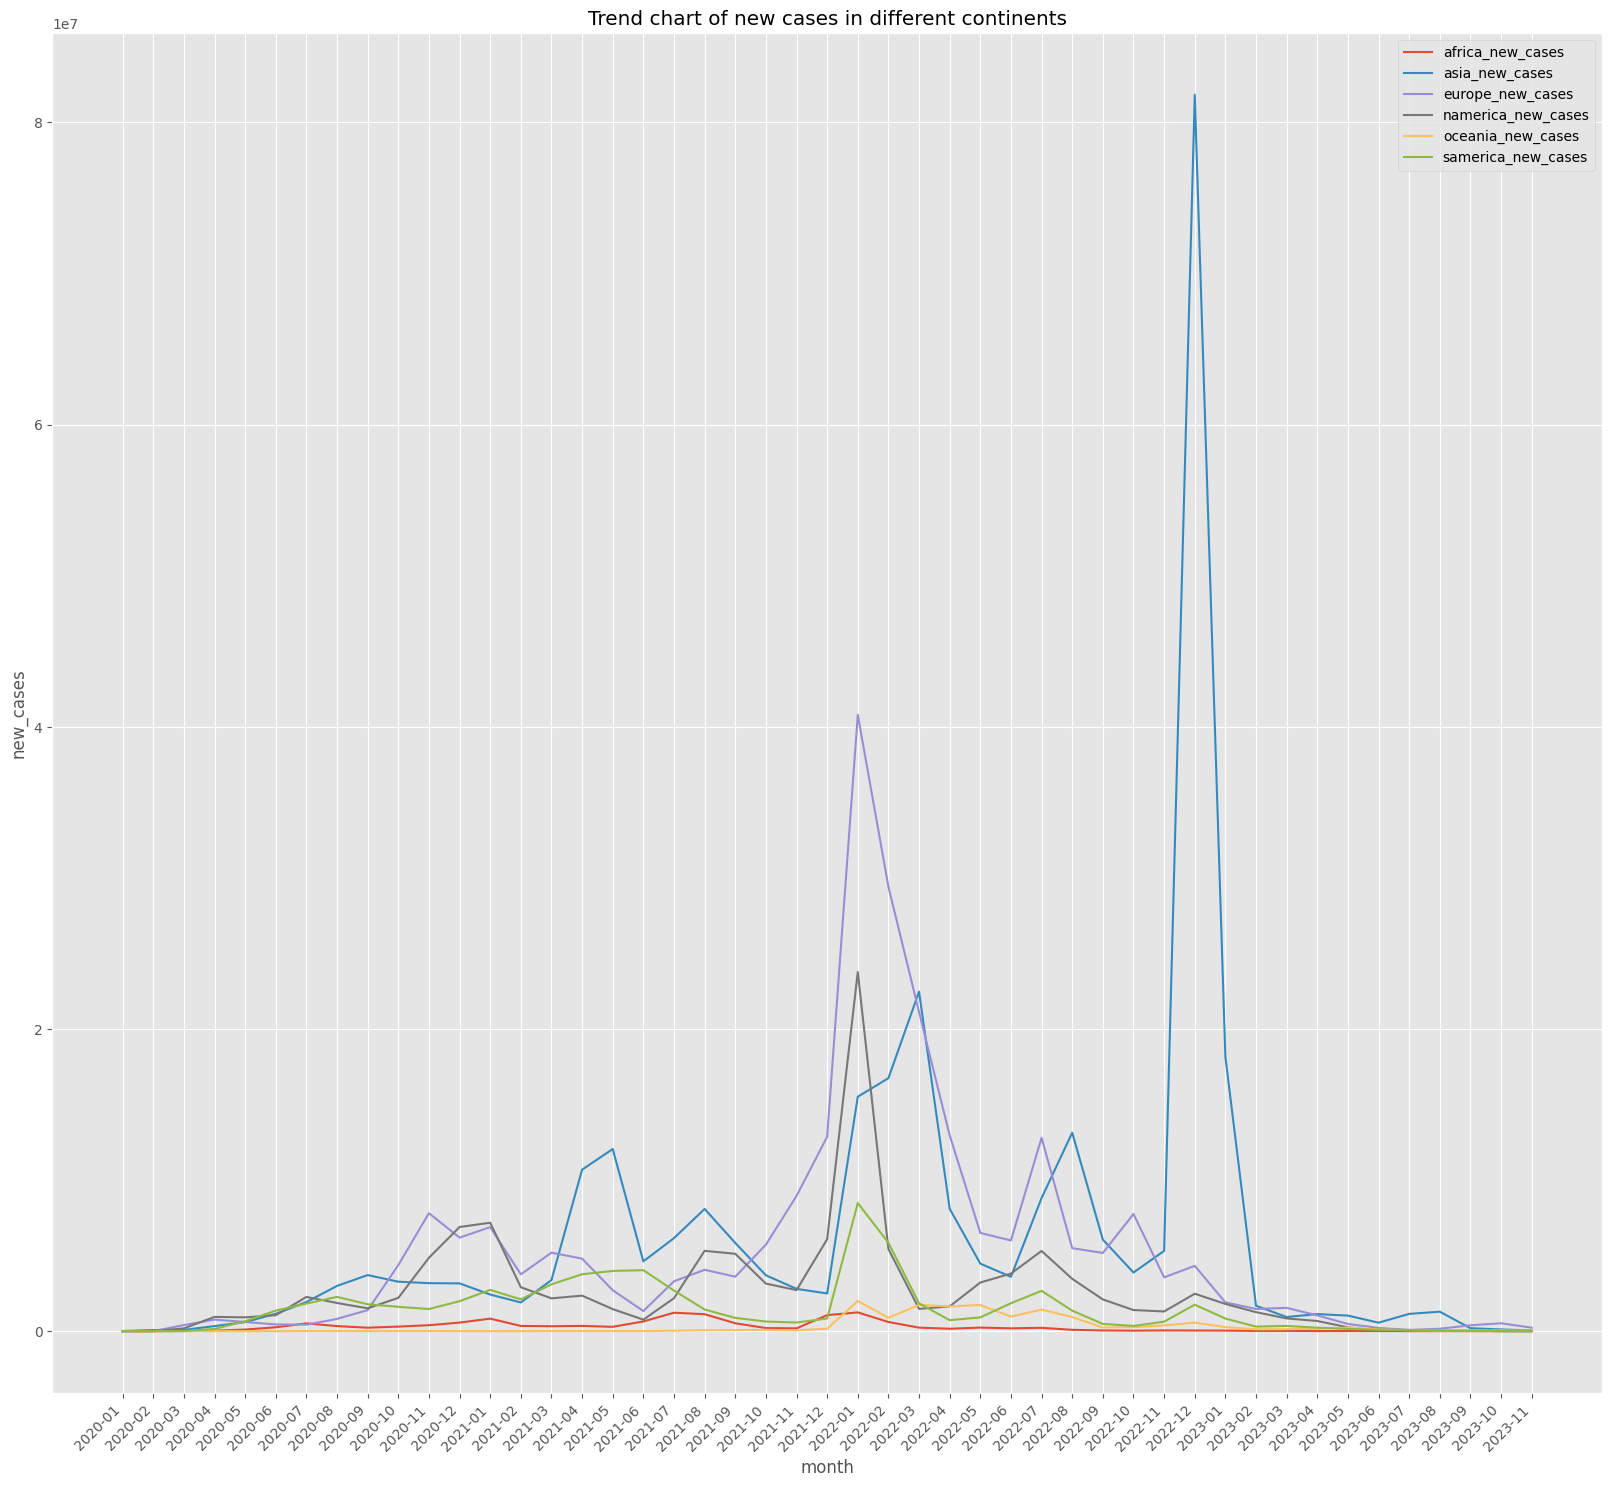

In [27]:
# Making a trend chart of new cases in different continent

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

fig = plt.figure(figsize=(20,20))
target_data = pd.read_csv('/home/ubuntu/notebooks/Final project/data_file.csv')
target_columns = ['africa_new_cases', 'asia_new_cases', 'europe_new_cases', 'namerica_new_cases', 'oceania_new_cases', 'samerica_new_cases']

plt.plot(target_data['month'], target_data['africa_new_cases'])
plt.plot(target_data['month'], target_data['asia_new_cases'])
plt.plot(target_data['month'], target_data['europe_new_cases'])
plt.plot(target_data['month'], target_data['namerica_new_cases'])
plt.plot(target_data['month'], target_data['oceania_new_cases'])
plt.plot(target_data['month'], target_data['samerica_new_cases'])

plt.title('Trend chart of new cases in different continents')
plt.xlabel('month')
plt.ylabel('new_cases')
plt.legend(['africa_new_cases', 'asia_new_cases', 'europe_new_cases', 'namerica_new_cases', 'oceania_new_cases', 'samerica_new_cases'])

fig.autofmt_xdate(rotation = 45)


In [28]:
%%sql
-- percentage of total new cases by asian countries
WITH TotalAsiaNewCases AS (
    SELECT
        SUM(cov.new_cases) AS total_new_cases
    FROM
        covid cov
    JOIN
        country c ON cov.country_key = c.key
    JOIN
        date d ON cov.date_key = d.key
    WHERE
        c.continent = 'Asia' AND
        cov.new_cases IS NOT NULL AND
        d.day BETWEEN '2022-11-01' AND '2023-03-30'
)
SELECT
    c.location,
    SUM(cov.new_cases) AS total_new_cases,
    SUM(cov.new_cases) / ta.total_new_cases * 100 AS percentage_of_total_new_cases
FROM
    covid cov
JOIN
    country c ON cov.country_key = c.key
JOIN
    date d ON cov.date_key = d.key
CROSS JOIN
    TotalAsiaNewCases ta
WHERE
    c.continent = 'Asia' AND
    cov.new_cases IS NOT NULL AND
    d.day BETWEEN '2022-11-01' AND '2023-03-30'
GROUP BY
    c.location, ta.total_new_cases
ORDER BY
    total_new_cases DESC;


 * postgresql://student@/f_group_10
47 rows affected.


location,total_new_cases,percentage_of_total_new_cases
China,90291442,83.68392265111697345400
Japan,11145852,10.33019958468264822700
South Korea,5252453,4.86807897674983749400
Indonesia,252930,0.23442060606526824700
Singapore,170275,0.15781429129705274500
Malaysia,149217,0.13829731378342281200
Israel,129677,0.12018724917062345500
Philippines,77354,0.07169324145642177700
India,59849,0.05546925573241703000
Brunei,42301,0.03920541674442301100


In [29]:
%%sql
-- correlation between population density and total new_cases reported in china over the specified period
SELECT
    location,
    CORR(new_cases, population_density) AS correlation
FROM (
    SELECT
        a.location,
        SPLIT_PART(c.day, '-', 1) || '-' || SPLIT_PART(c.day, '-', 2) AS month,
        SUM(b.new_cases) AS new_cases,
        SUM(CAST(a.population_density AS INTEGER)) AS population_density
    FROM
        (SELECT * FROM country WHERE continent IS NOT NULL) a
    JOIN
        (SELECT * FROM covid WHERE country_key IS NOT NULL) b ON a.key = b.country_key
    JOIN
        (SELECT * FROM date) c ON b.date_key = c.key
    WHERE
        day BETWEEN '2022-11-01' AND '2023-03-30' AND
        location IN ('China')
    GROUP BY
        a.location,
        SPLIT_PART(c.day, '-', 1) || '-' || SPLIT_PART(c.day, '-', 2)
) aa
group by aa.location;

 * postgresql://student@/f_group_10
1 rows affected.


location,correlation
China,0.5512352399236671


From the trend chart, we can see that Asia is the continent with the largest range of change of the new cases and Africa is the continent with the lowest range of change of the new cases. \
\
The reasons for this situation:
1. Population Density and Urbanization: Asia is the most populous continent with several highly dense urban areas. High population density can lead to more rapid spread of contagious diseases like COVID-19. In contrast, Africa, while also populous, has a different urbanization pattern and in many areas lower population density, which might contribute to a lower rate of spread.
2. Economic Factors: Economic prosperity allows for better healthcare facilities and more resources to deal with pandemics. Some Asian countries with strong economies might have better testing and reporting mechanisms, leading to a more accurate and possibly higher reporting of cases. In contrast, the economic challenges in many African countries might lead to underreporting or a lack of resources to extensively test and report cases.

Asia had many peaks for the covid new cases. These peaks are May 2021, August 2021, March 2022, August 2022, and December 2022. In December 2022, Asia has the most new cases. At the same time, the trend of new cases in other continents continually went down and seems to vanish. \
\
The reason for the peak of Asia in December 2022:
1. New Variants: The emergence of new, potentially more transmissible variants of COVID-19 such as Omicron could have played a significant role. Variants often lead to surges in cases as they may spread more easily or evade immunity from previous infections or vaccinations.
2. Relaxation of Restrictions: After periods of strict COVID-19 control measures, many Asian countries started to relax restrictions towards the end of 2022. This relaxation, including reopening borders and resumption of social activities, might have contributed to increased cases. In the article "Major Covid Holdouts in Asia Drop Border Restrictions," which was published in Sep 2022, Ben Dooley said that "Hong Kong said on Friday that it would abandon mandatory hotel quarantine for people coming to the city starting next week, following a similar move by Taiwan. Japan said it would drop its daily limit on arrivals and fully open its doors to tourists on Oct. 11," which can explain the going up trend of the new COVID cases at the end of 2022.
3. Cold Weather: In many regions, December marks the beginning of colder weather, which can lead to more indoor gatherings where the virus spreads more easily. Additionally, cold weather can affect immune responses and virus survival.


Application
1. Targeted Interventions: In regions like Asia where there’s a moderate correlation, public health interventions can be more focused on densely populated areas. This could include increased testing, vaccination drives, and public health messaging.
2. Resource Allocation: Governments and health organizations can allocate resources such as medical supplies, testing kits, and healthcare personnel more effectively, prioritizing areas with higher population densities, especially in continents like Asia and Africa.
3. Predictive Modeling: These correlations can be used to develop predictive models to forecast future outbreaks or the impact of public health interventions.